<a href="https://colab.research.google.com/github/jenny005/Machine-Learning/blob/master/StockForecastingwithGARCH_Chevron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install arch


     |████████████████████████████████| 798kB 6.0MB/s 


In [3]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Chevron Volatility**

In [4]:
start = datetime(2015, 1, 1)
end = datetime(2020, 11, 16)

In [5]:
chevron = web.DataReader('CVX', 'yahoo', start=start, end=end)

In [7]:
returns = 100 * chevron.Close.pct_change().dropna()

Text(0.5, 1.0, 'Chevron Returns')

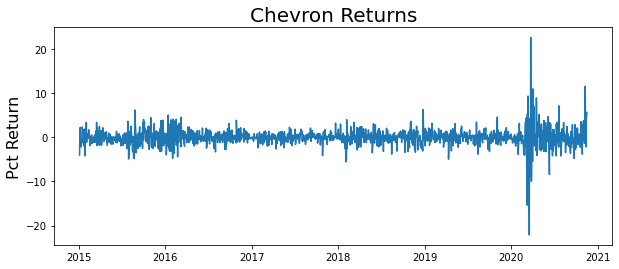

In [9]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Chevron Returns', fontsize=20)

**PACF**

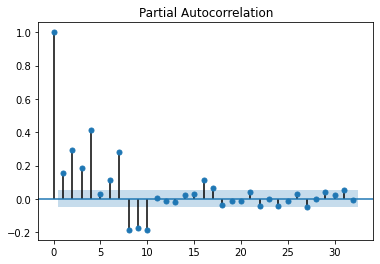

In [10]:
plot_pacf(returns**2)
plt.show()

Fit GARCH(4,4)

In [11]:
model = arch_model(returns, p=4, q=4)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 2689.7362403640263
Iteration:      2,   Func. Count:     29,   Neg. LLF: 2689.3526443545206
Iteration:      3,   Func. Count:     44,   Neg. LLF: 2688.9661092326337
Iteration:      4,   Func. Count:     57,   Neg. LLF: 2685.44959296831
Iteration:      5,   Func. Count:     71,   Neg. LLF: 2684.1793024253093
Iteration:      6,   Func. Count:     84,   Neg. LLF: 2682.643287509733
Iteration:      7,   Func. Count:     97,   Neg. LLF: 2681.1798304463446
Iteration:      8,   Func. Count:    110,   Neg. LLF: 2678.7413014253775
Iteration:      9,   Func. Count:    123,   Neg. LLF: 2677.5088066320377
Iteration:     10,   Func. Count:    136,   Neg. LLF: 2677.351974679279
Iteration:     11,   Func. Count:    149,   Neg. LLF: 2676.9841217028634
Iteration:     12,   Func. Count:    162,   Neg. LLF: 2676.682509289865
Iteration:     13,   Func. Count:    175,   Neg. LLF: 2676.528678359546
Iteration:     14,   Func. Count:    188,   Neg. LLF: 267

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2675.82
Distribution:                  Normal   AIC:                           5371.64
Method:            Maximum Likelihood   BIC:                           5424.63
                                        No. Observations:                 1479
Date:                Mon, Nov 16 2020   Df Residuals:                     1469
Time:                        16:54:45   Df Model:                           10
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0262  3.440e-02      0.760      0.447 [-4.127e-02,9.357e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1198      0.158      0.760      0.447    [ -0.189,  0.428]
alpha[1]       0.1119  4.168e-02      2.684  7.264e-03  [3.020e-02,  0.194]
alpha[2]       0.0311      0.169      0.184      0.854    [ -0.300,  0.362]
alpha[3]       0.0623  6.064e-02      1.027      0.304 [-5.657e-02,  0.181]
alpha[4]   9.9119e-03  8.223e-02      0.121      0.904    [ -0.151,  0.171]
beta[1]        0.0123      1.439  8.547e-03      0.993    [ -2.807,  2.832]
beta[2]        0.7399      0.357      2.070  3.847e-02  [3.927e-02,  1.441]
beta[3]        0.0000      1.057      0.000      1.000    [ -2.071,  2.071]
beta[4]        0.0000      0.258      0.000      1.000    [ -0.506,  0.506]
===========================================================================

Covariance estimator: robust
"""

Try GARCH(1,0) = ARCH(1)

In [14]:
model = arch_model(returns, p=1, q=0)

In [15]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2964.9350798841087
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2949.962141066975
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2949.1146443383795
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2922.4805538112832
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2912.5431893803157
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2907.930986278766
Iteration:      7,   Func. Count:     43,   Neg. LLF: 2906.482606894311
Iteration:      8,   Func. Count:     48,   Neg. LLF: 2905.987475885303
Iteration:      9,   Func. Count:     53,   Neg. LLF: 2905.9817878650697
Iteration:     10,   Func. Count:     58,   Neg. LLF: 2905.9816888798864
Iteration:     11,   Func. Count:     63,   Neg. LLF: 2905.9816845897467
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2905.9816845897444
            Iterations: 11
            Function evaluations: 63
            Gradient evalua

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -2905.98
Distribution:                  Normal   AIC:                           5817.96
Method:            Maximum Likelihood   BIC:                           5833.86
                                        No. Observations:                 1479
Date:                Mon, Nov 16 2020   Df Residuals:                     1476
Time:                        16:58:15   Df Model:                            3
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -7.9505e-03  8.178e-02 -9.721e-02      0.923 [ -0.168,  0.152]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.7763      0.166     10.717  8.499e-27 [  1.451,  2.101]
alpha[1]       0.7775      0.302      2.575  1.004e-02 [  0.186,  1.369]
========================================================================

Covariance estimator: robust
"""

Covariance estimator: robust

In [17]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [18]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

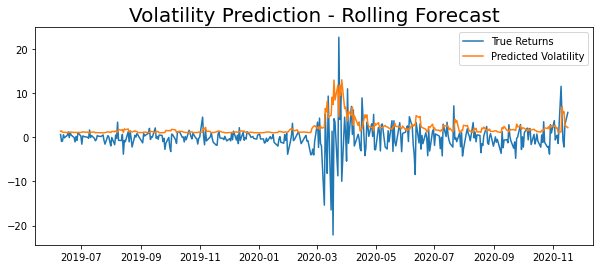

In [20]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10)